In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Padronização
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import imblearn

#treino
from sklearn.model_selection import train_test_split

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#Ignorar warning
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("dataset_tomate.csv")

In [12]:
df.head(5)

,id,trat,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,SR_d01,NDVI_d04,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
0,1,102,0.798284,1.197380,0.692652,16710.29721,9.728142,0.729767,1.094620,0.698726,21499.94698,6.907142,0.713179,1.069718,0.662425,13090.11459,6.216968,0.684125,1.026146,0.636865,13352.81776,5.421333,1
1,2,11,0.806955,1.210392,0.705323,19513.85630,10.557411,0.774359,1.161514,0.717367,30041.91766,8.531835,0.777758,1.166604,0.680269,22731.09954,8.380453,0.725521,1.088240,0.669113,16190.82038,6.491860,0
2,3,103,0.825104,1.237610,0.708468,18074.06986,11.141408,0.786941,1.180385,0.730471,29312.17626,8.982521,0.730708,1.096008,0.680238,12330.21702,6.670915,0.728171,1.092214,0.655206,15313.16198,6.551268,1
3,4,112,0.788884,1.183279,0.664787,16226.23017,8.990752,0.743874,1.115782,0.690141,22610.47885,7.109600,0.707999,1.061948,0.644786,12085.07787,6.017714,0.728161,1.092201,0.640739,16562.17418,6.608121,1
4,5,114,0.764986,1.147432,0.673490,14920.80711,8.269806,0.715948,1.073894,0.695619,22002.08151,6.447621,0.688155,1.032176,0.660206,10053.17885,5.571702,0.694320,1.041437,0.642373,13760.95583,5.665567,1


In [13]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          132 non-null    int64  
 1   trat        132 non-null    int64  
 2   NDVI_d28    132 non-null    float64
 3   SAVI_d28    132 non-null    float64
 4   GNDVI_d28   132 non-null    float64
 5   MCARI1_d28  132 non-null    float64
 6   SR_d28      132 non-null    float64
 7   NDVI_d01    132 non-null    float64
 8   SAVI_d01    132 non-null    float64
 9   GNDVI_d01   132 non-null    float64
 10  MCARI1_d01  132 non-null    float64
 11  SR_d01      132 non-null    float64
 12  NDVI_d04    132 non-null    float64
 13  SAVI_d04    132 non-null    float64
 14  GNDVI_d04   132 non-null    float64
 15  MCARI1_d04  132 non-null    float64
 16  SR_d04      132 non-null    float64
 17  NDVI_d08    132 non-null    float64
 18  SAVI_d08    132 non-null    float64
 19  GNDVI_d08   132 non-null    f

In [14]:
# Separando os dados em train test split

X = df.drop(columns=["id", "Classe"])

y = df['Classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# Escalando os dados para uma melhor padronização de alguns valores

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [16]:
# Montando as funções dos modelos

def mlp(x_test, x_train, y_test, y_train):
  perceptron = MLPClassifier(hidden_layer_sizes=(10, 5), random_state = 42, solver='lbfgs')
  perceptron.fit(x_train, y_train)
  print(f"Accuracy score: {round( accuracy_score(perceptron.predict(x_test), y_test), 2)}")
  print("")
  print("Matriz de confusão: ")
  cm = confusion_matrix(perceptron.predict(x_test), y_test)
  sns.heatmap(cm, annot=True)

def perceptron(x_test, x_train, y_test, y_train):
  perceptron = Perceptron()
  perceptron.fit(x_train, y_train)
  print(f"Accuracy score: {round( accuracy_score(perceptron.predict(x_test), y_test), 2)}")
  print("")
  print("Matriz de confusão: ")
  cm = confusion_matrix(perceptron.predict(x_test), y_test)
  sns.heatmap(cm, annot=True)

Accuracy score: 0.93

Matriz de confusão: 


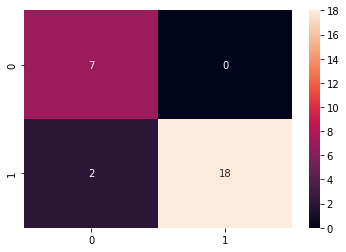

In [17]:
perceptron(x_test_scaled, x_train_scaled, y_test, y_train)